In [28]:
#!python -m spacy download en_core_web_md -qq

# Step 1
Collect data

In [29]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"  # see the value of multiple statements at once.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
import spacy
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()  # Visualise inside a notebook
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel

assets_dir = 'assets'
workers = 8

repos = pd.read_json(f'{assets_dir}/output.json')
repos.info()
repos.head()
# only use the first 10 repositories for testing
repos = repos[:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15862 entries, 0 to 15861
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           15862 non-null  object
 1   owner          15862 non-null  object
 2   description    15862 non-null  object
 3   topics         15862 non-null  object
 4   url            15862 non-null  object
 5   readme_base64  15862 non-null  object
dtypes: object(6)
memory usage: 743.7+ KB


,name,owner,description,topics,url,readme_base64
0,hub,mislav,A command-line tool that makes git easier to u...,"[go, homebrew, git, github-api, pull-request]",https://github.com/mislav/hub,aHViIGlzIGEgY29tbWFuZCBsaW5lIHRvb2wgdGhhdCB3cm...
1,lantern,getlantern,Lantern官方版本下载 蓝灯 翻墙 代理 科学上网 外网 加速器 梯子 路由 - Быс...,"[lantern, vpn, censorship, circumvention, gfw,...",https://github.com/getlantern/lantern,IyBMYW50ZXJuClshW2VuXShyZXNvdXJjZXMvRW5nbGlzaC...
2,direnv,direnv,unclutter your .profile,"[direnv, environment, shell-extension, bash, z...",https://github.com/direnv/direnv,ZGlyZW52IC0tIHVuY2x1dHRlciB5b3VyIC5wcm9maWxlCj...
3,go-cache,patrickmn,An in-memory key:value store/cache (similar to...,"[go, cache, library]",https://github.com/patrickmn/go-cache,IyBnby1jYWNoZQoKZ28tY2FjaGUgaXMgYW4gaW4tbWVtb3...
4,dns,miekg,DNS library in Go,"[dnssec, go, dns-library, dns]",https://github.com/miekg/dns,WyFbQnVpbGQgU3RhdHVzXShodHRwczovL3RyYXZpcy1jaS...


# Step 2
Preprocess data

In [30]:
from base64 import standard_b64decode
repos['readme_base64'] = repos['readme_base64'].apply(lambda x: standard_b64decode(x).decode('utf-8'))
repos['topics'] = repos['topics'].apply(lambda x: ' '.join(x))
repos['merged'] = repos['description'] + ' ' + repos['topics'] + ' ' + repos['readme_base64']
nlp = spacy.load('en_core_web_md')
removal = ['ADV', 'PRON', 'CCONJ', 'PUNCT', 'PART', 'DET', 'ADP', 'SPACE', 'NUM', 'SYM']
tokens = []

for i, merged_readme in enumerate(nlp.pipe(repos['merged'])):
   proj_tok = [token.lemma_.lower() for token in merged_readme if token.pos_ not in removal and not token.is_stop and token.is_alpha]
   tokens.append(proj_tok)

repos['tokens'] = tokens
# repos['tokens']


# Step 3
Create a dictionary and a corpus

In [31]:
dictionary = Dictionary(repos['tokens'])
# print(dictionary.token2id)
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)
corpus = [dictionary.doc2bow(doc) for doc in repos['tokens']]

# Step 4
Train the LDA model

In [32]:
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=50, num_topics=10, workers = workers, passes=10)

Python(29234) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(29235) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(29236) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(29237) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(29238) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(29239) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(29240) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(29241) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


# Step 5
Evaluate the model and visualize the topics with the highest coherence score

Python(29250) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(29251) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(29252) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(29253) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(29254) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(29255) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(29256) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(29257) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(29266) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(29267) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(29268) Malloc

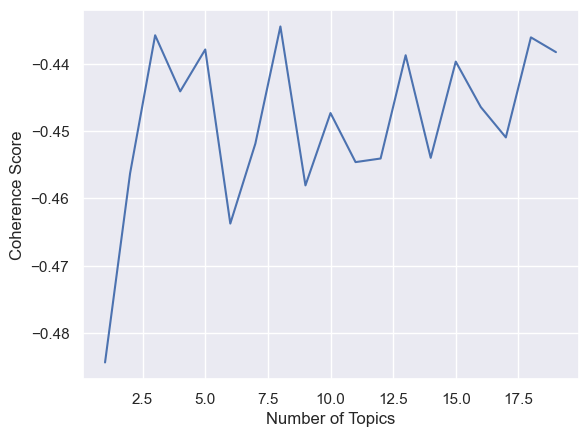

Python(29558) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(29559) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(29560) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(29561) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(29562) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(29563) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(29564) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(29565) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(29574) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(29575) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(29576) Malloc

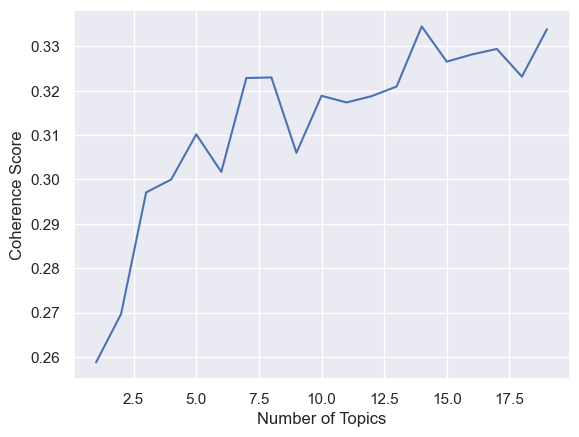

Python(30130) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(30131) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(30132) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(30133) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(30134) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(30135) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(30136) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(30137) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[(0,
  '0.369*"test" + 0.131*"content" + 0.071*"development" + 0.071*"useful" + 0.071*"import" + 0.012*"available" + 0.012*"bug" + 0.012*"exist" + 0.012*"mean" + 0.012*"find"'),
 (1,
  '0.176*"set" + 0.132*"find" + 0.129*"default" + 0.092*"need" + 0.074*"install" + 0.046*"available" + 0.046*"source" + 0.044*"feature" + 0.039*"user" + 0.023*"support"'),
 (2,
  '0.274*"install" + 0.072*"late" + 0.071*"feature" + 0.051*"note" + 0.049*"need" + 0.049*"exist" + 0.049*"list" + 0.049*"source" + 0.049*"set" + 0.048*"api"'),
 (3,
  '0.133*"import" + 0.117*"content" + 0.092*"note" + 0.090*"mean" + 0.085*"language" + 0.077*"include" + 0.057*"api" + 0.056*"install" + 0.056*"useful" + 0.042*"development"'),
 (4,
  '0.136*"support" + 0.077*"test" + 0.076*"api" + 0.068*"change" + 0.060*"current" + 0.056*"list" + 0.053*"standard" + 0.051*"exist" + 0.046*"feature" + 0.042*"include"')]

[(2, 0.9796911)]

'A command-line tool that makes git easier to use with GitHub. go homebrew git github-api pull-request hub is a command line tool that wraps `git` in order to extend it with extra\nfeatures and commands that make working with GitHub easier.\n\nFor an official, potentially more user-friendly command-line interface to GitHub,\nsee [cli.github.com](https://cli.github.com) and\n[this comparison](https://github.com/cli/cli/blob/trunk/docs/gh-vs-hub.md).\n\nThis repository and its issue tracker is **not for reporting problems with\nGitHub.com** web interface. If you have a problem with GitHub itself, please\n[contact Support](https://github.com/contact).\n\nUsage\n-----\n\n``` sh\n$ hub clone rtomayko/tilt\n#=> git clone https://github.com/rtomayko/tilt.git\n\n# or, if you prefer the SSH protocol:\n$ git config --global hub.protocol ssh\n$ hub clone rtomayko/tilt\n#=> git clone git@github.com:rtomayko/tilt.git\n```\n\nSee [usage examples](https://hub.github.com/#developer) or the [full refer

/Users/jbenitezg/Documents/GitHub/ECI-MS-Thesis/topic-analysis/lda/.venv/lib/python3.12/site-packages/joblib/_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
/Users/jbenitezg/Documents/GitHub/ECI-MS-Thesis/topic-analysis/lda/.venv/lib/python3.12/site-packages/joblib/_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
/Users/jbenitezg/Documents/GitHub/ECI-MS-Thesis/topic-analysis/lda/.venv/lib/python3.12/site-packages/joblib/_utils.py:39: DeprecationWarning: Attribute n is deprecated and will be removed in Python 3.14; use value instead
  return node.n
/Users/jbenitezg/Documents/GitHub/ECI-MS-Thesis/topic-analysis/lda/.venv/lib/python3.12/site-packages/joblib/_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant ins

In [33]:
topics = []
score = []
for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = workers, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

# Coherence score using C_v:
topics = []
score = []
for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = workers, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, texts = repos['tokens'], corpus=corpus, dictionary=dictionary, coherence='c_v')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=100, num_topics=5, workers = workers, passes=100)

lda_model.print_topics(-1)

# Where does a text belong to
lda_model[corpus][0]
repos['merged'][0]

# Visualize topics
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)

# Save the report
pyLDAvis.save_html(lda_display, f'{assets_dir}/index.html')
